# In-Class Exercise

Try to a build a simple optimizer to minimize:

    f(w) = a[0]*w^d + a[1]*w^(d-1) + ... + a[d]
    

for the coefficients `a = [1,0,-2,0.5,0]`


*  Plot the function f(w)
*  Can you see where the minima is?
*  Write a function that outputs f(w) and its gradient.
*  Test the gradient
*  Run the optimizer on the function to see if it finds the minima.
*  Print the funciton value and number of iterations.

Bonus: Instead of writing the function for a specific coefficient vector a, create a class that works for an arbitrary vector a.
You may wish to use the `np.polyval(a,x)` method to evaluate the polynomial.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

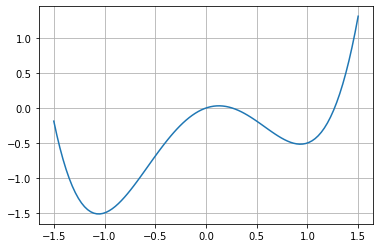

In [3]:
a = np.array([1,0,-2,0.5,0])
w = np.linspace(-1.5,1.5,100)
f = np.polyval(a,w)

plt.plot(w,f)
plt.grid()

In [4]:
def feval(w,a):
    f = np.polyval(a,w)
    
    d = len(a)-1
    b = np.arange(d,0,-1)*a[0:-1]
    fgrad = np.array(np.polyval(b,w))
    return f, fgrad

feval_param = lambda w: feval(w,a)

Test the gradient

In [5]:
w0 = np.array(0.6)
w1 = w0 + 1e-6
f0, fgrad0 = feval(w0,a)
f1, fgrad1 = feval(w1,a)
print('f1-f0 act = %12.4e' % (f1-f0))
print('f1-f0 est = %12.4e' % (fgrad0.dot(w1-w0)))

f1-f0 act =  -1.0360e-06
f1-f0 est =  -1.0360e-06


Gradient descent optimizer with adaptive step size.  this is taken from the demo

In [6]:
def grad_opt_adapt(feval, winit, nit=1000, lr_init=1e-3):
    """
    Gradient descent optimization with adaptive step size
    
    feval:  A function that returns f, fgrad, the objective
            function and its gradient
    winit:  Initial estimate
    nit:    Number of iterations
    lr:     Initial learning rate
    """
    
    # Set initial point
    w0 = winit
    f0, fgrad0 = feval(w0)
    lr = lr_init
    
    # Create history dictionary for tracking progress per iteration.
    # This isn't necessary if you just want the final answer, but it 
    # is useful for debugging
    hist = {'lr': [], 'w': [], 'f': []}

    for it in range(nit):

        # Take a gradient step
        w1 = w0 - lr*fgrad0

        # Evaluate the test point by computing the objective function, f1,
        # at the test point and the predicted decrease, df_est
        f1, fgrad1 = feval(w1)
        df_est = fgrad0.dot(w1-w0)
        
        # Check if test point passes the Armijo condition
        alpha = 0.5
        if (f1-f0 < alpha*df_est) and (f1 < f0):
            # If descent is sufficient, accept the point and increase the
            # learning rate
            lr = lr*2
            f0 = f1
            fgrad0 = fgrad1
            w0 = w1
        else:
            # Otherwise, decrease the learning rate
            lr = lr/2            
            
        # Save history
        hist['f'].append(f0)
        hist['lr'].append(lr)
        hist['w'].append(w0)

    # Convert to numpy arrays
    for elem in ('f', 'lr', 'w'):
        hist[elem] = np.array(hist[elem])
    return w0, f0, hist

Run the gradient descent optimizer

In [10]:
winit = -1.5
w0, f0, hist = grad_opt_adapt(feval_param, winit, nit=1000, lr_init=1e-3)


-1.0574537745557437 -1.5147536412757057


Plot the trajectory.  We see we hit the global minima if we start at `winit=-1.5`.  The green dot is the initial point, the red is the final point.

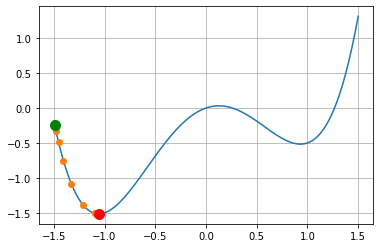

In [8]:
a = np.array([1,0,-2,0.5,0])
w = np.linspace(-1.5,1.5,100)
f = np.polyval(a,w)

whist = hist['w']
fhist = hist['f']
plt.plot(w,f)
plt.plot(whist,fhist,'o')
plt.plot(whist[0], fhist[0], 'go', markersize=10)
plt.plot(whist[-1], fhist[-1], 'ro', markersize=10)
plt.grid()

But, if we start at `winit = 1.5`, it goes to the wrong minima.

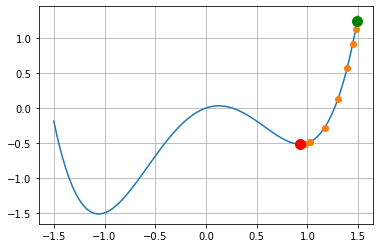

In [9]:
winit = 1.5
w0, f0, hist = grad_opt_adapt(feval_param, winit, nit=100, lr_init=1e-3)

a = np.array([1,0,-2,0.5,0])
w = np.linspace(-1.5,1.5,100)
f = np.polyval(a,w)

whist = hist['w']
fhist = hist['f']
plt.plot(w,f)
plt.plot(whist,fhist,'o')
plt.plot(whist[0], fhist[0], 'go', markersize=10)
plt.plot(whist[-1], fhist[-1], 'ro', markersize=10)
plt.grid()